In [1]:
%matplotlib inline
import pandas as pd


In [3]:
titles=pd.read_csv('titles.csv',index_col=None)
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [4]:
cast=pd.read_csv('cast.csv',index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# 1.Using groupby(), plot the number of films that have been released each decade in the history of cinema.

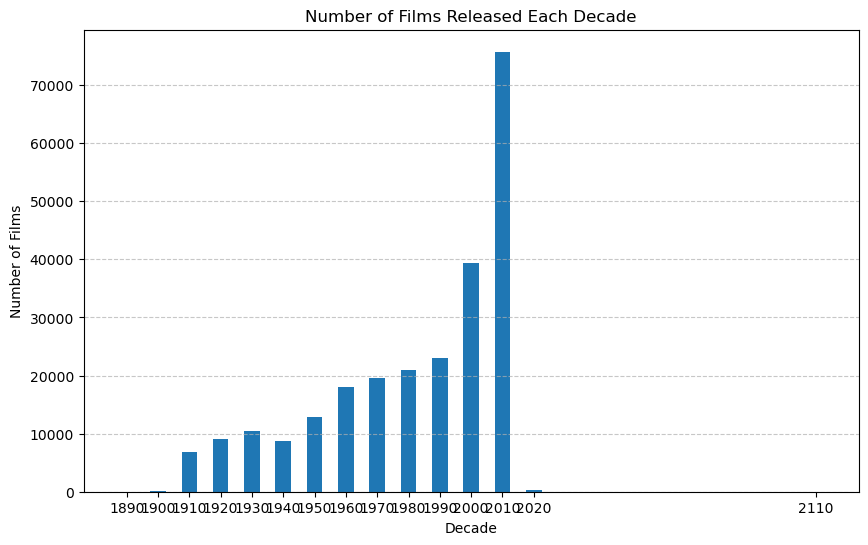

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
titles = pd.read_csv('titles.csv', index_col=None)
titles['decade'] = (titles['year'] // 10) * 10
decade_counts = titles.groupby('decade')['title'].count().reset_index()
decade_counts.columns = ['Decade', 'Number of Films']
plt.figure(figsize=(10, 6))
plt.bar(decade_counts['Decade'], decade_counts['Number of Films'], width=5)
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.title('Number of Films Released Each Decade')
plt.xticks(decade_counts['Decade'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 2.Use groupby() to plot the number of "Hamlet" films made each decade.

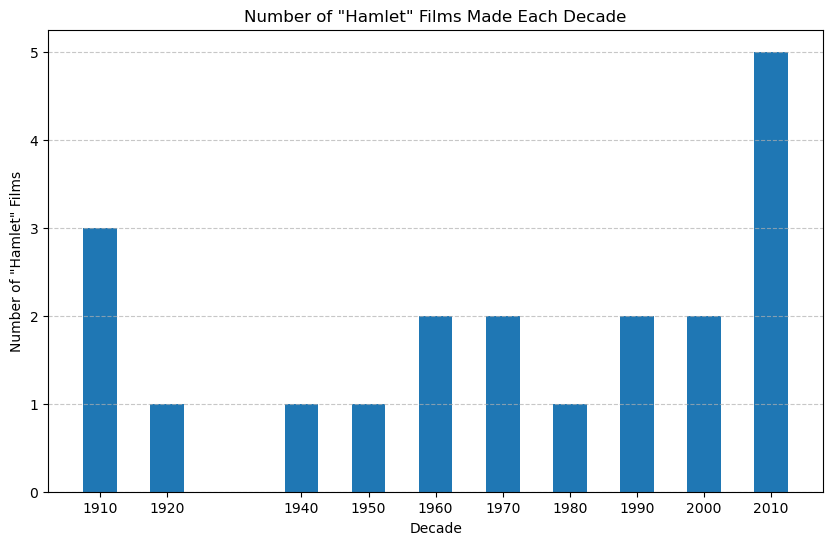

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
titles=pd.read_csv('titles.csv',index_col=None)
titles['decade'] = (titles['year'] // 10) * 10

# Filter the DataFrame to include only "Hamlet" films
hamlet_films = titles[titles['title'] == 'Hamlet']

# Group by decade and count the number of "Hamlet" films in each decade
hamlet_decade_counts = hamlet_films.groupby('decade')['title'].count().reset_index()
hamlet_decade_counts.columns = ['Decade', 'Number of "Hamlet" Films']
plt.figure(figsize=(10, 6))
plt.bar(hamlet_decade_counts['Decade'], hamlet_decade_counts['Number of "Hamlet" Films'], width=5)
plt.xlabel('Decade')
plt.ylabel('Number of "Hamlet" Films')
plt.title('Number of "Hamlet" Films Made Each Decade')
plt.xticks(hamlet_decade_counts['Decade'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 3.How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [3]:
import pandas as pd
cast = pd.read_csv('cast.csv', index_col=None)
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959
leading_roles = roles_1950s[roles_1950s['n'] == 1]
leading_roles_by_year_gender = leading_roles.groupby(['year', 'type'])['n'].count().reset_index()

# Rename the columns for clarity
leading_roles_by_year_gender.columns = ['Year', 'Gender', 'Number of Leading Roles']

# Pivot the table to have 'Year' as the index and 'Gender' as columns
pivot_table = leading_roles_by_year_gender.pivot(index='Year', columns='Gender', values='Number of Leading Roles')

# Fill NaN values with 0, as there may be years with no leading roles of a particular gender
pivot_table = pivot_table.fillna(0)

# Display the result
print(pivot_table)


Gender  actor  actress
Year                  
1950      625      288
1951      651      285
1952      613      304
1953      664      312
1954      636      316
1955      648      285
1956      668      307
1957      739      315
1958      715      301
1959      733      327


# 4.In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [6]:
# Assuming you have a DataFrame named 'cast' with 'year', 'type', and 'n' columns.

# Filter the data for the 1950s decade (1950-1959)
cast_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

# Filter the data for actors and actresses separately
actors = cast_1950s[cast_1950s['type'] == 'actor']
actresses = cast_1950s[cast_1950s['type'] == 'actress']

# Group and count the roles for each "n" number from 1 to 5
actor_roles_by_n = actors[actors['n'].between(1, 5)].groupby('n')['n'].count()
actress_roles_by_n = actresses[actresses['n'].between(1, 5)].groupby('n')['n'].count()

# Create DataFrames to display the results
actor_results = pd.DataFrame({'n': actor_roles_by_n.index, 'Actor Roles': actor_roles_by_n.values})
actress_results = pd.DataFrame({'n': actress_roles_by_n.index, 'Actress Roles': actress_roles_by_n.values})

# Fill any missing values (NaN) with 0
actor_results.fillna(0, inplace=True)
actress_results.fillna(0, inplace=True)

# Display the results
print("Total roles available to actors for each 'n' number:")
print(actor_results)
print("\nTotal roles available to actresses for each 'n' number:")
print(actress_results)


Total roles available to actors for each 'n' number:
     n  Actor Roles
0  1.0         6692
1  2.0         4640
2  3.0         5654
3  4.0         5663
4  5.0         5674

Total roles available to actresses for each 'n' number:
     n  Actress Roles
0  1.0           3040
1  2.0           4635
2  3.0           3201
3  4.0           2881
4  5.0           2592


# 5.Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [1]:
import pandas as pd
cast = pd.read_csv('cast.csv', index_col=None)
pink_panther_roles = cast[cast['title'].str.contains('Pink Panther', case=False)]

roles_per_movie = pink_panther_roles.groupby('title')['title'].count()
print(roles_per_movie)


title
Curse of the Pink Panther          67
Revenge of the Pink Panther        68
Son of the Pink Panther            46
The Pink Panther                  111
The Pink Panther 2                 84
The Pink Panther Strikes Again     70
The Return of the Pink Panther     30
Trail of the Pink Panther          41
Name: title, dtype: int64


# 6.List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [7]:
# Assuming you have a DataFrame named 'cast'

# Filter roles for Frank Oz
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

# Group roles by the film's title and year and count the number of roles
roles_by_film_year = frank_oz_roles.groupby(['title', 'year'])['character'].count().reset_index()

# Filter for films where Frank Oz played more than one role
films_with_multiple_roles = roles_by_film_year[roles_by_film_year['character'] > 1]

# Sort the result by year
sorted_films = films_with_multiple_roles.sort_values('year')

# Display the result
print(sorted_films)


                                   title  year  character
24                      The Muppet Movie  1979          8
0         An American Werewolf in London  1981          2
22                The Great Muppet Caper  1981          6
20                      The Dark Crystal  1982          2
25            The Muppets Take Manhattan  1984          7
2                       Follow That Bird  1985          3
23            The Muppet Christmas Carol  1992          7
7                 Muppet Treasure Island  1996          4
8                     Muppets from Space  1999          4
18  The Adventures of Elmo in Grouchland  1999          3


# 7.List each of the characters that Frank Oz has portrayed at least twice.

In [4]:
# Assuming you have a DataFrame named 'cast'

# Filter roles for Frank Oz
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

# Group roles by character and count the number of times each character appears
character_counts = frank_oz_roles.groupby('character').size().reset_index(name='count')

# Filter characters that appear at least twice
characters_at_least_twice = character_counts[character_counts['count'] >= 2]

# Display the result
print(characters_at_least_twice)


         character  count
0           Animal      6
2             Bert      3
5   Cookie Monster      5
10     Fozzie Bear      4
15          Grover      2
18      Miss Piggy      6
25   Sam the Eagle      5
34            Yoda      6
